# House Price Dataset - Part 2
In this section, we would make us of __transformed training and testing data set__ to apply machine learning algorithms and finally, evaluating them.

## Feature Selection
In this section we would select the features which will be used to predict house sales price.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.25,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.545455,0.75,0.666667,0.75
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.50,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.636364,0.50,0.666667,0.75
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.50,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.090909,1.00,0.666667,0.75
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.25,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.636364,0.25,0.666667,0.75
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.50,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.545455,0.50,0.666667,0.75


In [3]:
# capture the target
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)

Let's go ahead and select a subset of the most predictive features. There is an element of randomness in the Lasso regression, so remember to set the seed

In [4]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))
sel_.fit(X_train, y_train)

# let's print the number of total and selected features
selected_feat = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 75
selected features: 21
features with coefficients shrank to zero: 54


In [5]:
# print the selected features
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive'],
      dtype='object')

## Apply Linear Regression
Using __Lasso Regularization__ we would implement Linear Regression. 

In [6]:
# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
# reduce the train and test set to the desired features

X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

### Train the model

In [8]:
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

### Model Prediction and Evaluation
Now we would predict the data and also, evaluate the model

In [9]:
train_pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(train_pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(train_pred)))))
print()
test_pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(test_pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(test_pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 1087445118.7685966
linear train rmse: 32976.43277810074

linear test mse: 1403319878.3806221
linear test rmse: 37460.911339429826

Average house price:  163000.00000000012


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

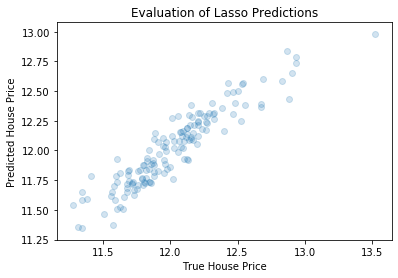

In [10]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, test_pred, alpha=0.2, cmap='viridis')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

__We can see that our model is doing a pretty good job at estimating house prices.__

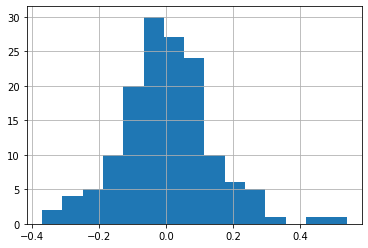

In [11]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - test_pred
errors.hist(bins=15)

The __distribution of the errors__ follows quite closely a __gaussian distribution__. 

__That suggests that our model is doing a good job as well.__

## Apply Random Forest Regressor
In this section, we would apply __random forest regressor__ algorithm. 

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

Lets define some paramteters to find the best fit model.

In [17]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
rfr = RandomForestRegressor(random_state=0)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='neg_mean_squared_log_error',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_log_error',
          verbose=1)

In [18]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean score of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean score of a model with these hyperparameters is:
-0.00011255483161675698


Using the above paramters, lets define parameters for __Grid Search__.

In [19]:
# n_estimators
n_estimators = [700, 800, 900]

# max_features
max_features = ['sqrt']

# max_depth
max_depth = [80, 100, 120]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [False]

# Create the random grid
_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 0)

# First create the base model to tune
rfr = RandomForestRegressor(random_state=0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfr, 
                           param_grid=_grid,
                           scoring='neg_mean_squared_log_error',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 10.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [700, 800, 900], 'max_features': ['sqrt'], 'max_depth': [80, 100, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=1)

In [20]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean score of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean score of a model with these hyperparameters is:
-0.0001243151623361834


### Train Model
In this section we would __fetch the best estimator__ and train the model.

In [21]:
best_rfr = grid_search.best_estimator_
best_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model Prediction and Evaluation
Now we would predict the data and also, evaluate the model.

In [27]:
ftrain_pred = best_rfr.predict(X_train)
print('random forest train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(ftrain_pred))))
print('random forest train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(ftrain_pred)))))
print()
ftest_pred = best_rfr.predict(X_test)
print('random forest test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(ftest_pred))))
print('random forest test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(ftest_pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

random forest train mse: 61737509.894433424
random forest train rmse: 7857.3220561736825

random forest test mse: 973651315.9107314
random forest test rmse: 31203.386289163096

Average house price:  163000.00000000012


Text(0.5, 1.0, 'Evaluation of Random Forest Predictions')

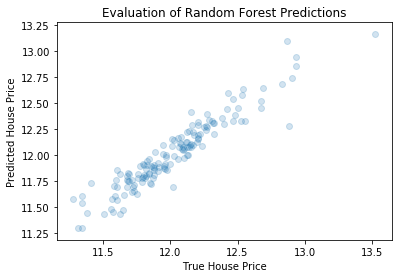

In [26]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, ftest_pred, alpha=0.2, cmap='viridis')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Random Forest Predictions')

__Random Forest Model is also doing well enough__

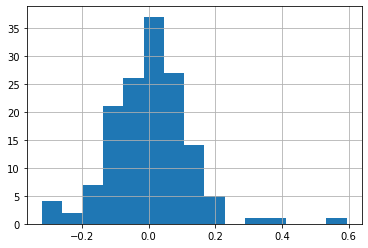

In [24]:
ferrors = y_test - ftest_pred
ferrors.hist(bins=15)

## Conclusion
We train the model using __Lasso Regression__ and __Random Forest Regressor__ and predicted the _house price_ with good accuracy.